# **Tech Challenge - Fase 1**

---

## **O Problema**
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio é a **seguro_saude.csv** na pasta **Base de Dados**.

## **Tarefas**

### **Exploração de dados:**
- Carregue a base de dados e explore suas características.
- Analise estatísticas descritivas e visualize distribuições relevantes.

### **Pré-processamento de dados:**
- Realize a limpeza dos dados, tratando valores ausentes (se necessário).
- Converta variáveis categóricas em formatos adequados para modelagem.

### **Modelagem:**
- Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvore de Decisão, etc...).
- Divida o conjunto de dados em conjuntos de treinamento e teste.

### **Treinamento e avaliação do modelo:**
- Treine o modelo com conjunto de treinamento.

### **Validação estatística:**
- Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

---

### **Instalando as bibliotecas necessárias.**

In [5]:
# !python -m pip install pandas
# !python -m pip install matplotlib
# !python -m pip install seaborn
# !python -m pip install scikit-learn
# !python -m pip install xgboost
# !python -m pip install numpy

### **Importando as bibliotecas necessárias.**

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


warnings.filterwarnings('ignore')

### **Exploração de dados.**

**Lendo o arquivo de entrada.**

In [7]:
caminho_arquivo = '../Base de Dados/seguro_saude.csv'

pd.set_option('display.max_columns', None)

seguro_saude_df = pd.read_csv(caminho_arquivo)

**Observações preliminares.**

In [8]:
seguro_saude_df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,feminino,27.9,0,sim,sudoeste,16884.92
1,18,masculino,33.8,1,não,sudeste,1725.55
2,28,masculino,33.0,3,não,sudeste,4449.46
3,33,masculino,22.7,0,não,noroeste,21984.47
4,32,masculino,28.9,0,não,noroeste,3866.86


In [9]:
seguro_saude_df.tail()

,idade,gênero,imc,filhos,fumante,região,encargos
1333,50,masculino,31.0,3,não,noroeste,10600.55
1334,18,feminino,31.9,0,não,nordeste,2205.98
1335,18,feminino,36.9,0,não,sudeste,1629.83
1336,21,feminino,25.8,0,não,sudoeste,2007.95
1337,61,feminino,29.1,0,sim,noroeste,29141.36


In [10]:
seguro_saude_df.shape

(1338, 7)

In [11]:
seguro_saude_df.describe()

,idade,imc,filhos,encargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [12]:
seguro_saude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   gênero    1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   object 
 5   região    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
seguro_saude_df.isnull().sum()

idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64

Através das observações preliminares é possível validar que o dataset possue 1338 linhas e 7 colunas, destas 7 colunas 4 são númericas e 3 são categóricas e o dataset não possui valores faltantes ou nulos.

**Validando a distribuição dos encargos**

<Axes: >

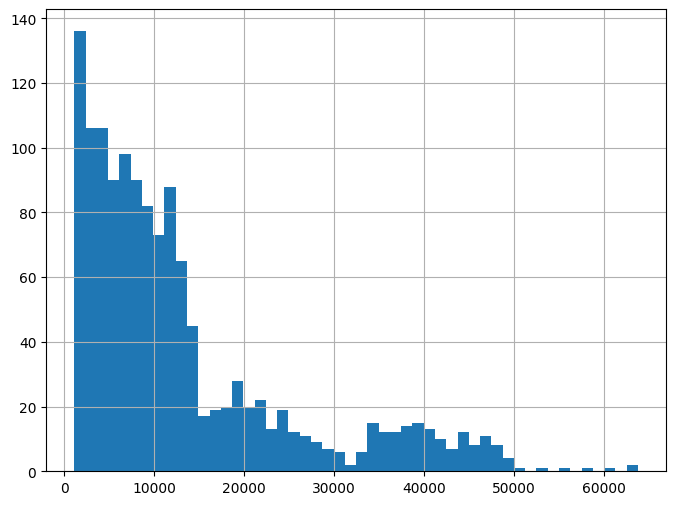

In [14]:
seguro_saude_df['encargos'].hist(bins=50, figsize=(8, 6))

Validando os encargos separados por região.

In [15]:
encargos = seguro_saude_df['encargos'].groupby(seguro_saude_df['região']).sum().sort_values(ascending=True)
encargos.head()

região
sudoeste    4012754.82
noroeste    4035711.93
nordeste    4343668.64
sudeste     5363689.80
Name: encargos, dtype: float64

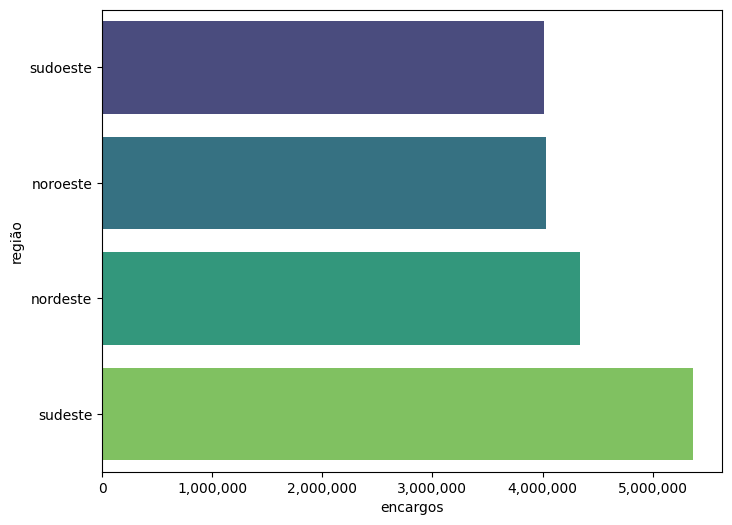

In [16]:
import matplotlib.ticker as ticker

f, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x=encargos.head(), y=encargos.head().index, palette='viridis')

ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Através do gráfico é possível validar que, em geral, a região sudeste possui o maior encargo e a sudoeste o menor.

Se levarmos em consideração outros fatores como gênero, se é fumante ou se possui filhos como será a diferença por região?

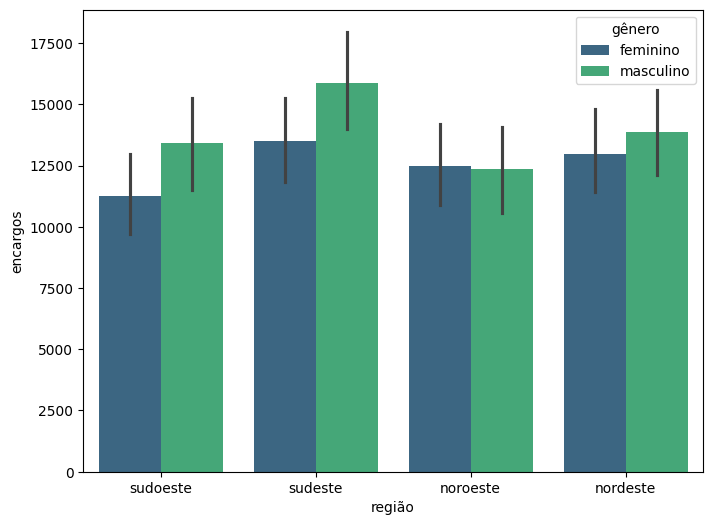

In [17]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))

ax = sns.barplot(x='região', y='encargos', hue='gênero', data=seguro_saude_df, palette='viridis')

Apenas na região noroeste o encargo se equipara entre o gênero feminino e masculino, no restante das regiões o gênero masculino possui os encargos maiores.

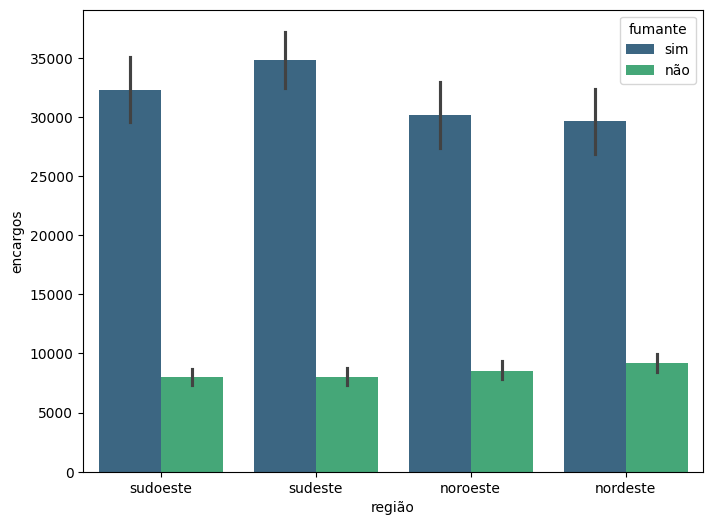

In [18]:
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x='região', y='encargos', hue='fumante', data=seguro_saude_df, palette='viridis')

Entre todas as regiões parece que uma pessoa fumante possui um encargo maior.

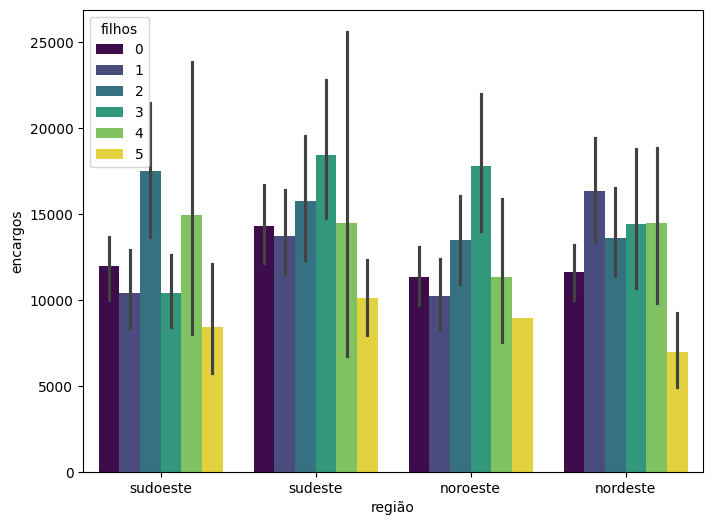

In [19]:
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x='região', y='encargos', hue='filhos', data=seguro_saude_df, palette='viridis')

Entre as regiões, em geral, as pessoas que possuem mais de 2 filhos tendem a ter um encargo mais alto.

Como uma pessoa que é fumante apresentou a maior variação de encargo, vamos analisar os encargos pela idade, imc e filhos com o fator de fumar.

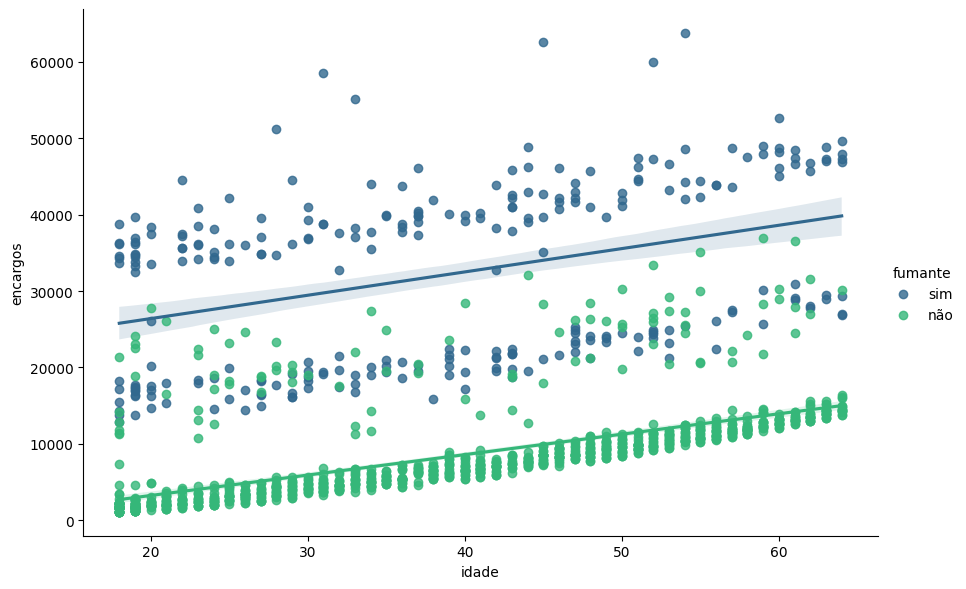

In [20]:
ax = sns.lmplot(x='idade', y='encargos', data=seguro_saude_df, hue='fumante', palette='viridis', height=6, aspect=1.5)

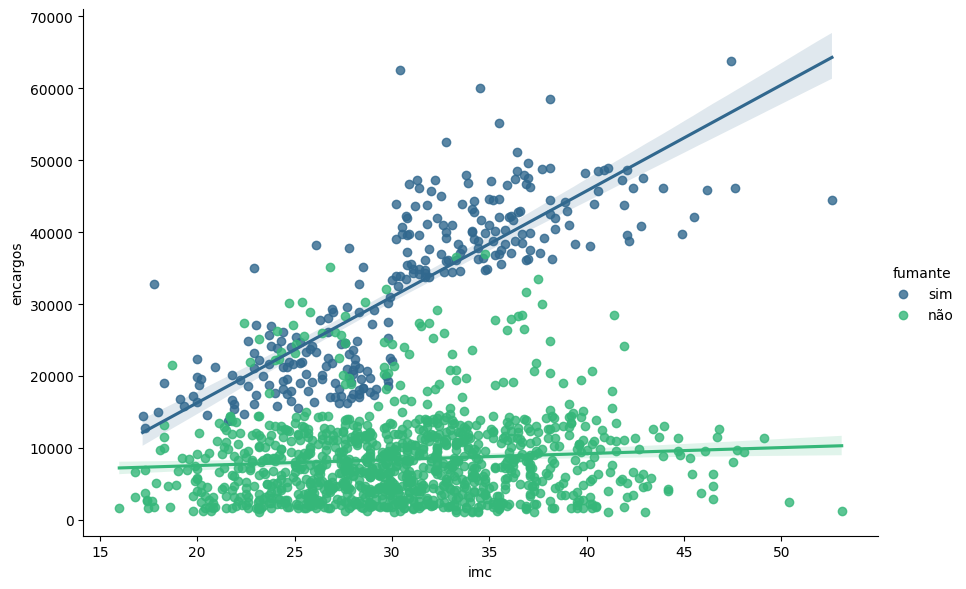

In [21]:
ax = sns.lmplot(x='imc', y='encargos', data=seguro_saude_df, hue='fumante', palette='viridis', height=6, aspect=1.5)

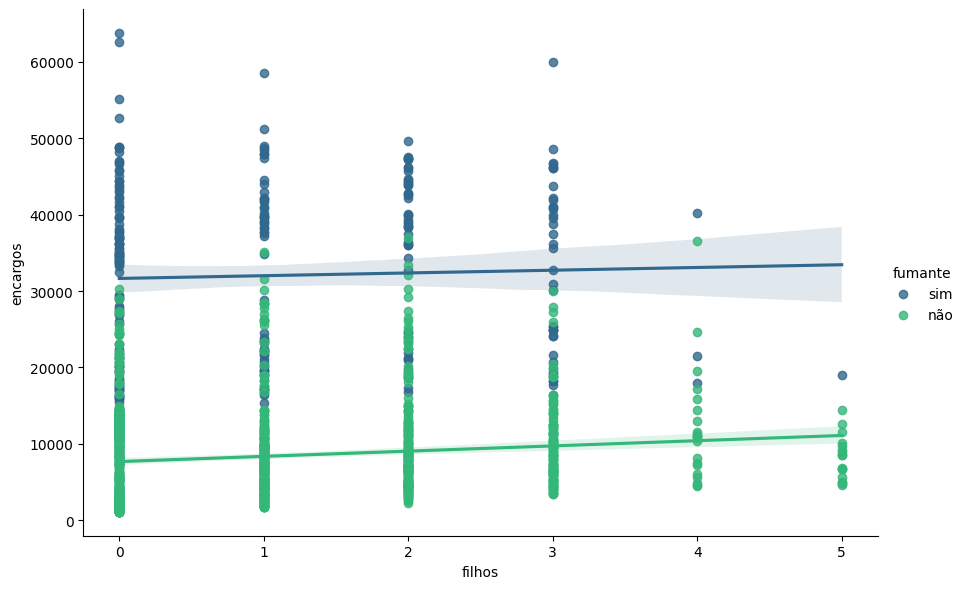

In [22]:
ax = sns.lmplot(x='filhos', y='encargos', data=seguro_saude_df, hue='fumante', palette='viridis', height=6, aspect=1.5)

Uma pessoa fumar tem um impacto muito grande nos encargos mesmo com o mesmo crescendo com a idade, imc e quantidade de filhos. Pessoas com 5 filhos tendem a fumar menos.

Podemos verificar este comportamento com um gráfico de violino.

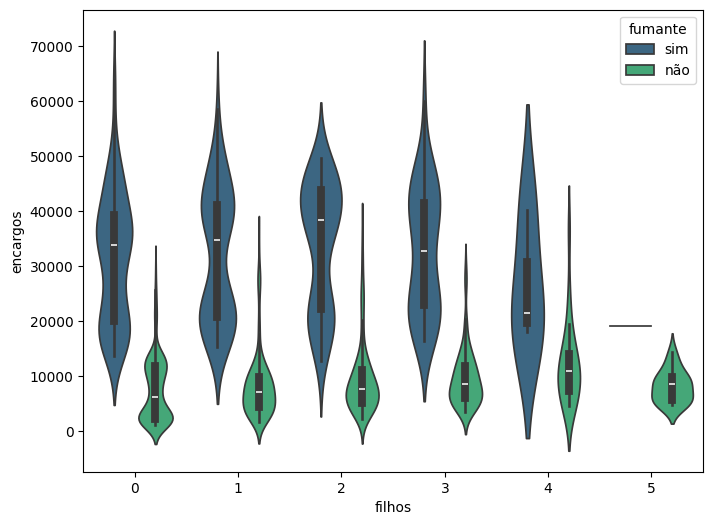

In [23]:
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.violinplot(x='filhos', y='encargos', hue='fumante', data=seguro_saude_df, palette='viridis')

**Colunas numéricas**

In [24]:
# Listando as colunas númericas
colunas_numericas = seguro_saude_df.select_dtypes(exclude=['object'])
colunas_numericas.columns

Index(['idade', 'imc', 'filhos', 'encargos'], dtype='object')

In [25]:
# Quantidade de colunas númericas
len(colunas_numericas.columns)

4

Através da validação acima confirmamos que as colunas númericas realmente são 4, sendo as seguintes:
- idade
- imc
- filhos
- encargos

As colunas númericas possuem as seguintes características gerais:

In [26]:
colunas_numericas.describe().round(2)

,idade,imc,filhos,encargos
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


**Colunas categóricas**

In [27]:
colunas_categoricas = seguro_saude_df.select_dtypes(include=['object'])
colunas_categoricas.columns

Index(['gênero', 'fumante', 'região'], dtype='object')

In [28]:
len(colunas_categoricas.columns)

3

Através da validação acima também confirmamos que as colunas categóricas são 3, sendo as seguintes:
- gênero
- fumante
- região

Pela separação das colunas númericas e categóricas vimos que não temos nenhuma coluna que foi separado de forma errada, ou seja, que deveria ser númerica e foi como categórica ou vice-versa.

Com isso ficamos com a seguinte separação:

Coluna Númerica
- idade
- imc
- filhos
- encargos

Coluna Categórica
- gênero
- fumante
- região

**Explorando as colunas númericas.**

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

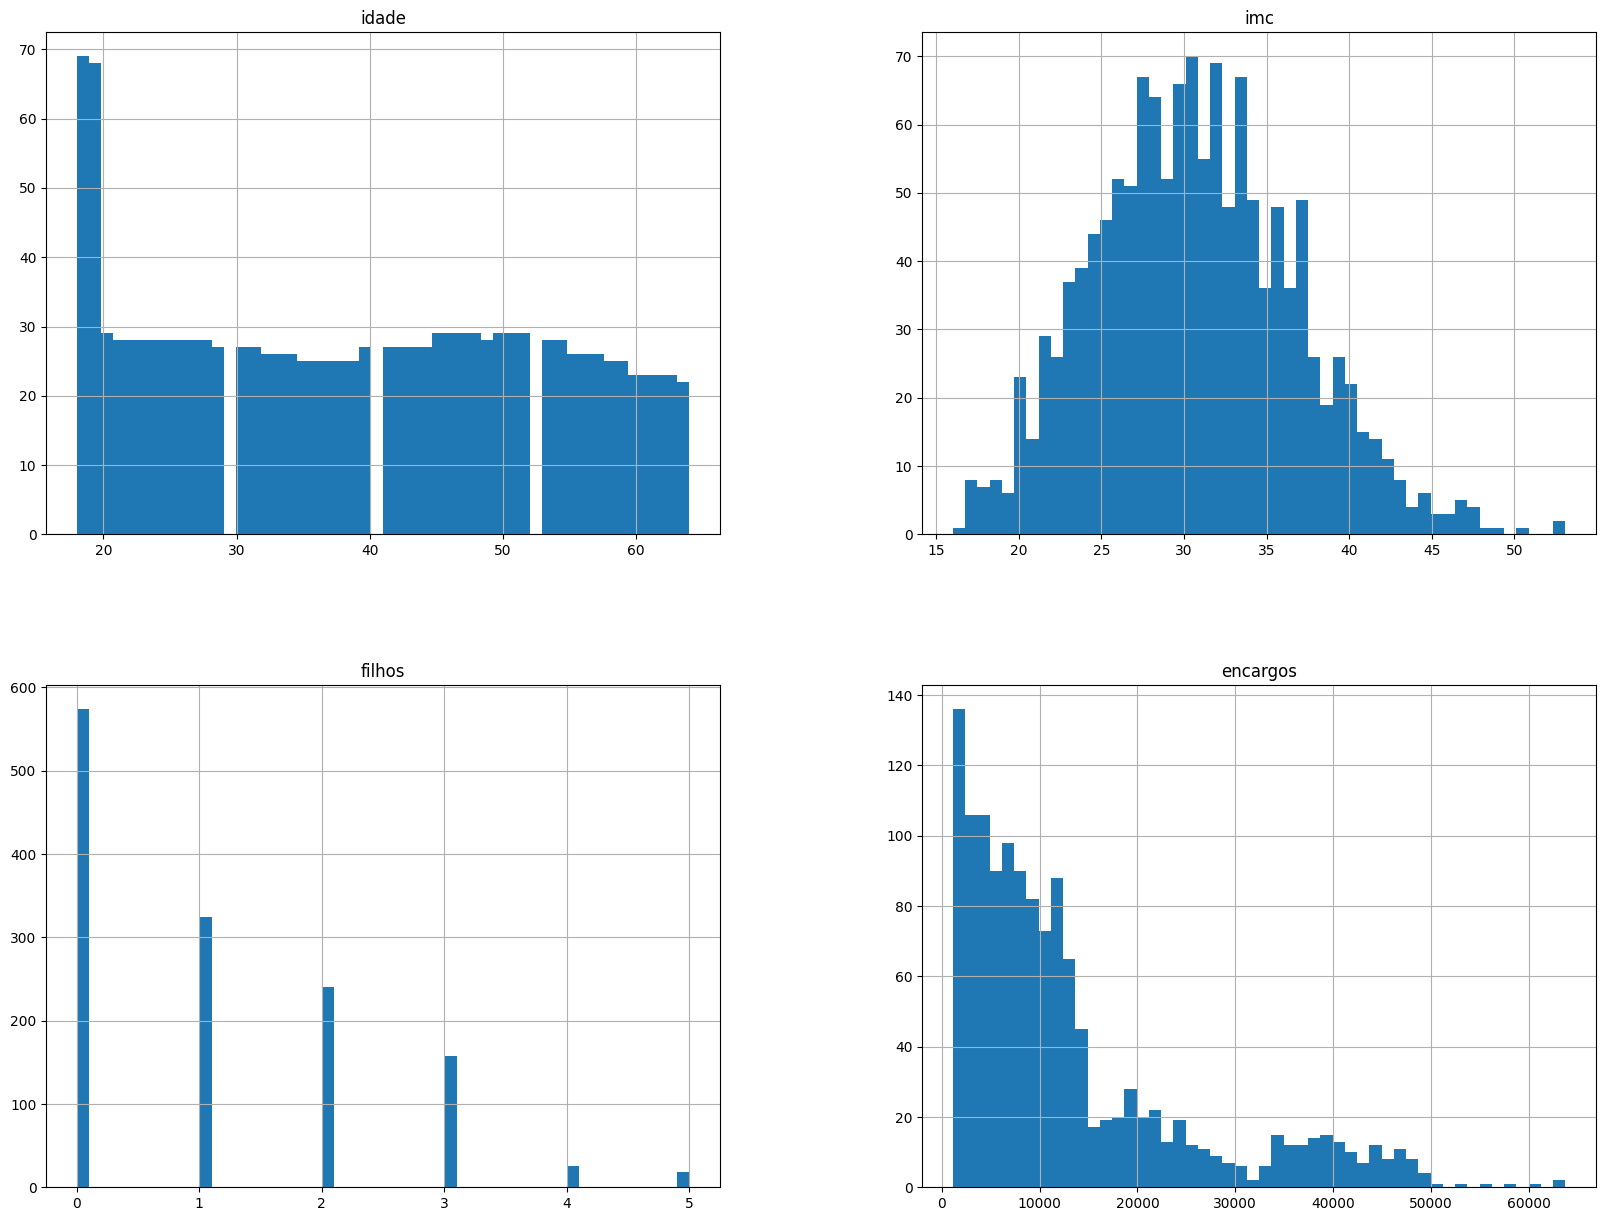

In [29]:
# Distribuição das colunas com histograma
colunas_numericas.hist(bins=50, figsize=(20, 15))

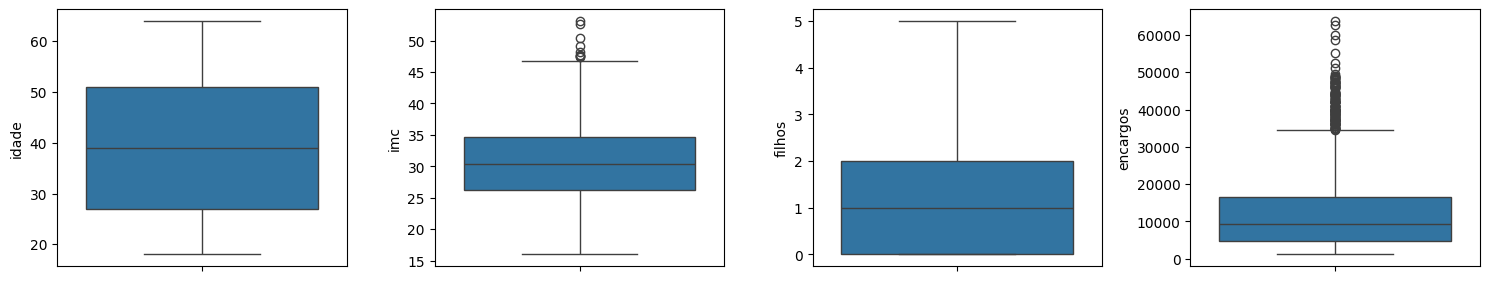

In [30]:
# Distribuição das colunas com boxplot
fig = plt.figure(figsize=(15, 25))

for i in range(len(colunas_numericas.columns)):
    fig.add_subplot(9, 4, i + 1)
    
    sns.boxplot(y=colunas_numericas.iloc[:, i])
    
plt.tight_layout()
plt.show()

Aparentemente minha coluna imc possui outliers acima do imc 47, vamos validar.

In [31]:
Q1 = seguro_saude_df['imc'].quantile(0.25)
Q3 = seguro_saude_df['imc'].quantile(0.75)

IQR = Q3 - Q1

# Definir limites
limite_superior = Q3 + 1.5 * IQR

print(limite_superior)

47.300000000000004


**Explorando as colunas categóricas.**

Coluna 'gênero'.

In [32]:
set(seguro_saude_df['gênero'])

{'feminino', 'masculino'}

<Axes: xlabel='gênero', ylabel='count'>

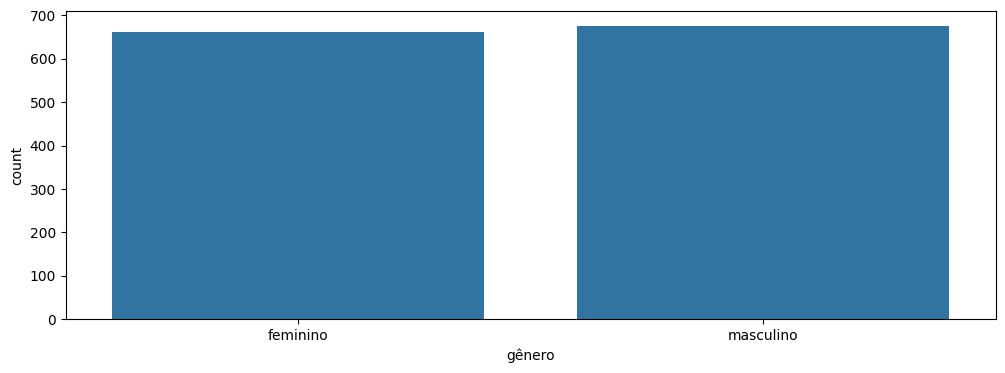

In [33]:
# Validando a frequência da coluna 'gênero'
plt.figure(figsize=(12, 4))

sns.countplot(x='gênero', data=seguro_saude_df)

In [34]:
# Calcular a contagem de frequência de cada categoria
frequencia = seguro_saude_df['gênero'].value_counts()

# Calcular a porcentagem de frequência de cada categoria
porcentagem = (frequencia / len(seguro_saude_df)) * 100
porcentagem = porcentagem.round(2)  # Arredondar para 2 casas decimais

print("\nPorcentagem de cada categoria:")
print(porcentagem)


Porcentagem de cada categoria:
gênero
masculino    50.52
feminino     49.48
Name: count, dtype: float64


Podemos validar que a coluna 'gênero' possui 50.52% masculino e 49.48% feminino. O que mostra que nosso dataset está bem distribuido entre os gêneros.

Coluna 'fumante'.

In [35]:
set(seguro_saude_df['fumante'])

{'não', 'sim'}

<Axes: xlabel='fumante', ylabel='count'>

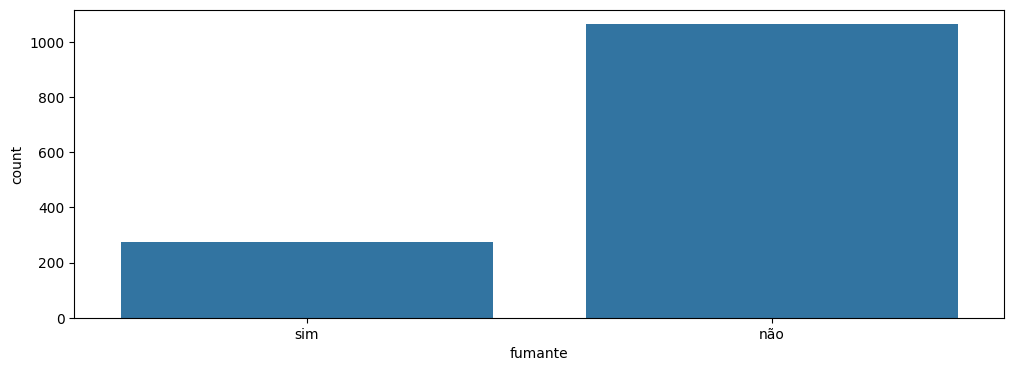

In [36]:
# Validando a frequência da coluna 'fumante'
plt.figure(figsize=(12, 4))

sns.countplot(x='fumante', data=seguro_saude_df)

In [37]:
# Calcular a contagem de frequência de cada categoria
frequencia = seguro_saude_df['fumante'].value_counts()

# Calcular a porcentagem de frequência de cada categoria
porcentagem = (frequencia / len(seguro_saude_df)) * 100
porcentagem = porcentagem.round(2)  # Arredondar para 2 casas decimais

print("\nPorcentagem de cada categoria:")
print(porcentagem)


Porcentagem de cada categoria:
fumante
não    79.52
sim    20.48
Name: count, dtype: float64


Podemos validar que a coluna 'fumante' possui 20.48% de fumantes e 79.52% de não fumantes. O que mostra que temos um desbalanceamento na coluna 'fumante'.

Coluna 'região'.

In [38]:
set(seguro_saude_df['região'])

{'nordeste', 'noroeste', 'sudeste', 'sudoeste'}

<Axes: xlabel='região', ylabel='count'>

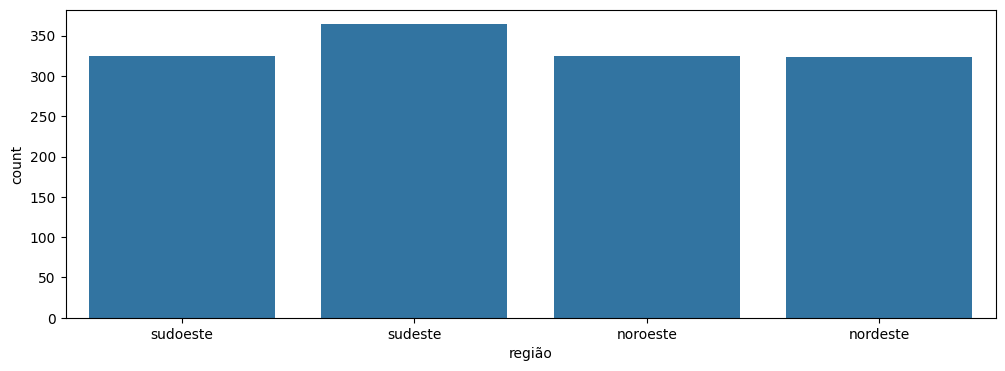

In [39]:
# Validando a frequência da coluna 'região'
plt.figure(figsize=(12, 4))

sns.countplot(x='região', data=seguro_saude_df)

In [40]:
# Calcular a contagem de frequência de cada categoria
frequencia = seguro_saude_df['região'].value_counts()

# Calcular a porcentagem de frequência de cada categoria
porcentagem = (frequencia / len(seguro_saude_df)) * 100
porcentagem = porcentagem.round(2)  # Arredondar para 2 casas decimais

print("\nPorcentagem de cada categoria:")
print(porcentagem)


Porcentagem de cada categoria:
região
sudeste     27.20
sudoeste    24.29
noroeste    24.29
nordeste    24.22
Name: count, dtype: float64


Podemos validar que a coluna 'região' possui 27.20% de pessoas no sudeste, 24.29% no sudoeste, 24.29% no noroeste e 24.22% no nordeste. O que mostra que nosso dataset está bem distribuido entre as regiões.

**Correlação**

Através das análises gráficas conseguimos ver, inicialmente, que o maior fator para que um encargo seja alto é se a pessoa fuma.

Vamos validar, através de um heatmap, se realmente é isso?

Primeiro vamos transformar nossas colunas categóricas em númericas com o LabelEncoder.

In [41]:
label_encoder = LabelEncoder()

seguro_saude_df_encoded = seguro_saude_df.copy()

for coluna in colunas_categoricas:
    seguro_saude_df_encoded[coluna] = label_encoder.fit_transform(seguro_saude_df_encoded[coluna])

seguro_saude_df_encoded.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


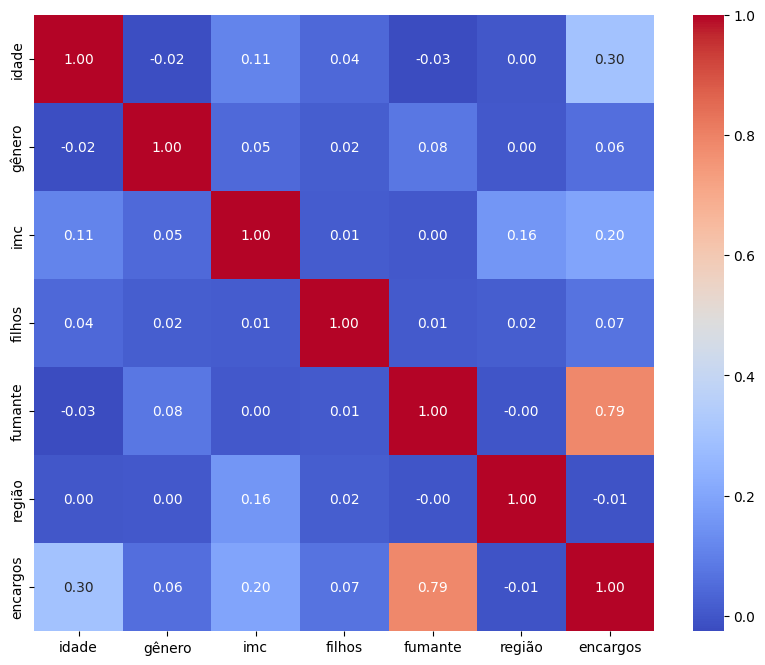

In [42]:
f, ax = plt.subplots(figsize=(10, 8))

ax = sns.heatmap(seguro_saude_df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')

Pelo heatmap vimos que realmente fumante tem uma grande relação com os encargos, porém vamos utilizar o OneHotEncoding para saber se pessoas que fumam ou não fumam possuem essa correlação de 0.79.

In [43]:
seguro_saude_df_dummies = pd.get_dummies(seguro_saude_df, drop_first=True)
seguro_saude_df_dummies.head()

,idade,imc,filhos,encargos,gênero_masculino,fumante_sim,região_noroeste,região_sudeste,região_sudoeste
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


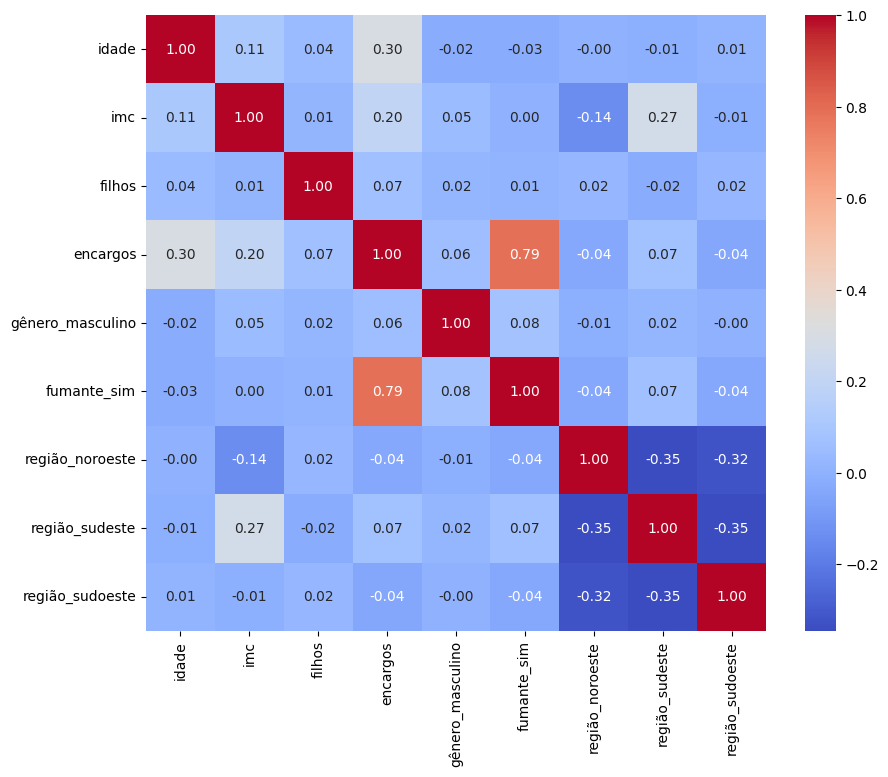

In [44]:
f, ax = plt.subplots(figsize=(10, 8))

ax = sns.heatmap(seguro_saude_df_dummies.corr(), annot=True, fmt='.2f', cmap='coolwarm')

O heatmap aponta exatamente o que vimos nos gráficos, que pessoas fumantes tem uma grande correlação com o valor dos encargos.

Outras correlações que podemos verificar, também, é com idade e imc, apesar de não serem muito altas.

### **Pré-processamento de dados.**

**Separando os dados em treino e teste**

A separação do dataset em teste e treino será da seguinte forma:

- x -> Minhas colunas independentes.
- y -> Minha coluna target.

In [45]:
X = seguro_saude_df.drop('encargos', axis=1)
X.head()

,idade,gênero,imc,filhos,fumante,região
0,19,feminino,27.9,0,sim,sudoeste
1,18,masculino,33.8,1,não,sudeste
2,28,masculino,33.0,3,não,sudeste
3,33,masculino,22.7,0,não,noroeste
4,32,masculino,28.9,0,não,noroeste


In [46]:
y = seguro_saude_df['encargos']
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: encargos, dtype: float64

Vou criar um preprocessor para realizar as seguintes ações:
- **SimpleImputer**: Alterando todos os valores faltantes e nulos pela média da coluna, no caso das colunas númericas, e pelo mais comum, no caso das colunas categóricas.
- **StantardScaler**: Scalonar os valores númericos.
- **OneHotEncoder**: Transformar as colunas categóricas em númericas.

Apesar de nosso dataset não possuir valores faltantes ou nulos vou deixar o SimpleImputer no meu preprocessor.

In [47]:
colunas_numericas = ['idade', 'imc', 'filhos']
colunas_numericas_transf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('StandardScaler', StandardScaler())])

colunas_categoricas = ['gênero', 'fumante', 'região']
colunas_categoricas_transf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num', colunas_numericas_transf, colunas_numericas),
    ('cat', colunas_categoricas_transf, colunas_categoricas)])

Irei deixar 80% do meu dataset para treino e 20% para teste.

In [48]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(1070, 6) (268, 6) (1070,) (268,)


Utilizando o meu preprocessor para transformar as bases de teste e treino.

In [49]:
X_treino_preprocessado = preprocessor.fit_transform(X_treino)
X_teste_preprocessado = preprocessor.transform(X_teste)

### **Modelagem.**

**Validando modelos de regressão**

Vou verificar, utilizando alguns modelos de regressão, como cada um vai se sair nas métricas de predição.

Modelos:
- **Linear Regression**
- **Random Forest Regression**
- **XGBoost**
- **Support Vector Regression**
- **Decision Tree Regression**


In [50]:
comparacao_mae = pd.DataFrame(columns=['MAE'])
comparacao_mae.index.name = 'Modelo'

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_treino_preprocessado, y_treino)

linear_regression_pred = linear_regression.predict(X_teste_preprocessado)

linear_regression_mae = mean_absolute_error(y_teste, linear_regression_pred)

comparacao_mae.loc['Linear Regression'] = [linear_regression_mae]

# Random Forest
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_treino_preprocessado, y_treino)

random_forest_regressor_pred = random_forest_regressor.predict(X_teste_preprocessado)

random_forest_regressor_mae = mean_absolute_error(y_teste, random_forest_regressor_pred)

comparacao_mae.loc['Random Forest'] = [random_forest_regressor_mae]

# XGBoost
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_treino_preprocessado, y_treino)

xgb_regressor_pred = xgb_regressor.predict(X_teste_preprocessado)

xgb_regressor_mae = mean_absolute_error(y_teste, xgb_regressor_pred)

comparacao_mae.loc['XGBoost'] = [xgb_regressor_mae]

# Support Vector Regression
svr = SVR()
svr.fit(X_treino_preprocessado, y_treino)

svr_pred = svr.predict(X_teste_preprocessado)

svr_mae = mean_absolute_error(y_teste, svr_pred)

comparacao_mae.loc['Support Vector Regression'] = [svr_mae]

# Decision Tree Regression
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_treino_preprocessado, y_treino)

decision_tree_regressor_pred = decision_tree_regressor.predict(X_teste_preprocessado)

decision_tree_regressor_mae = mean_absolute_error(y_teste, decision_tree_regressor_pred)

comparacao_mae.loc['Decision Tree Regression'] = [decision_tree_regressor_mae]

In [51]:
comparacao_mae_ordenado = comparacao_mae.sort_values(by='MAE')
comparacao_mae_ordenado.head()

,MAE
Modelo,
Random Forest,2562.995361
XGBoost,2874.172806
Decision Tree Regression,3269.470597
Linear Regression,4179.999366
Support Vector Regression,8605.849729


Nos modelos de teste inicial o que se saiu melhor foi o Random Forest, vamos visualizar como ficou em um gráfico:

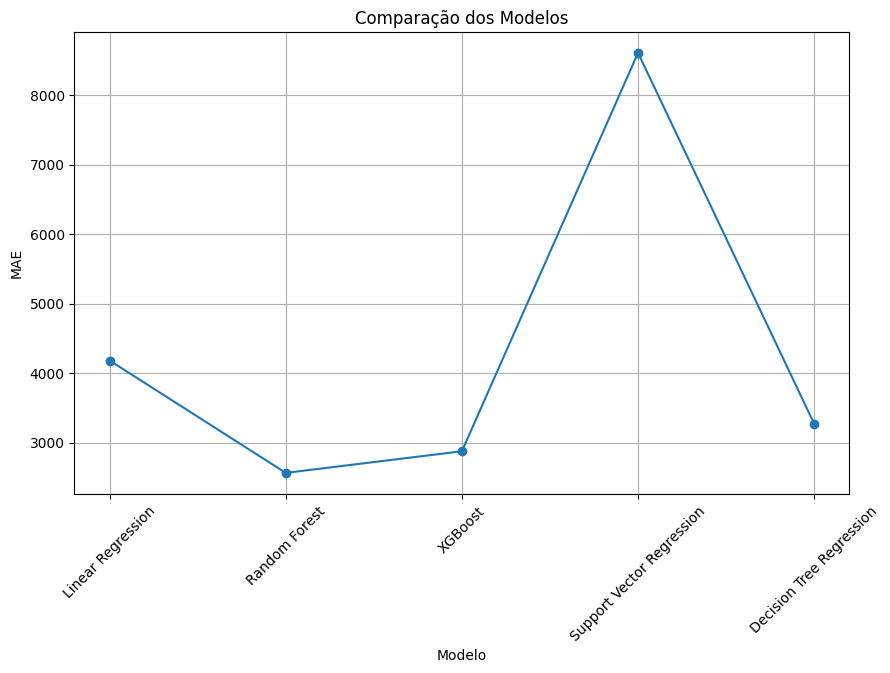

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(comparacao_mae.index, comparacao_mae['MAE'], marker='o')
plt.title('Comparação dos Modelos')
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Validação cruzada**

Utilizando a validação cruzada vou verificar como fica o R2-Score dos 3 melhores:
- **Random Forest**
- **XGBoost**
- **Decision Tree Regression**

Primeiro vamos pre-processar o conjunto de dados X.

In [60]:
X_preprocessado = preprocessor.fit_transform(X)

In [65]:
modelos = ['RandomForest', 'XGBoost', 'DecisionTreeRegression']

n_folds = 10

validacao_cruzada_mae = pd.DataFrame(columns=['R2-Score'])
validacao_cruzada_mae.index.name = 'Modelo'

for modelo in modelos:
    modelo_predicao = None

    if modelo == 'RandomForest':
        modelo_predicao = RandomForestRegressor(random_state=42)
    elif modelo == 'XGBoost':
        modelo_predicao = XGBRegressor(random_state=42)
    elif modelo == 'DecisionTreeRegression':
        modelo_predicao = DecisionTreeRegressor(random_state=42)

    modelo_mae = cross_val_score(modelo_predicao, X_preprocessado, y, scoring='r2', cv=n_folds)

    validacao_cruzada_mae.loc[modelo] = [modelo_mae.mean()]

In [66]:
validacao_cruzada_mae.head()

,R2-Score
Modelo,
RandomForest,0.836738
XGBoost,0.804962
DecisionTreeRegression,0.697889


O que se saiu melhor novamente foi o RandomForest, vamos validar como ficou no gráfico:

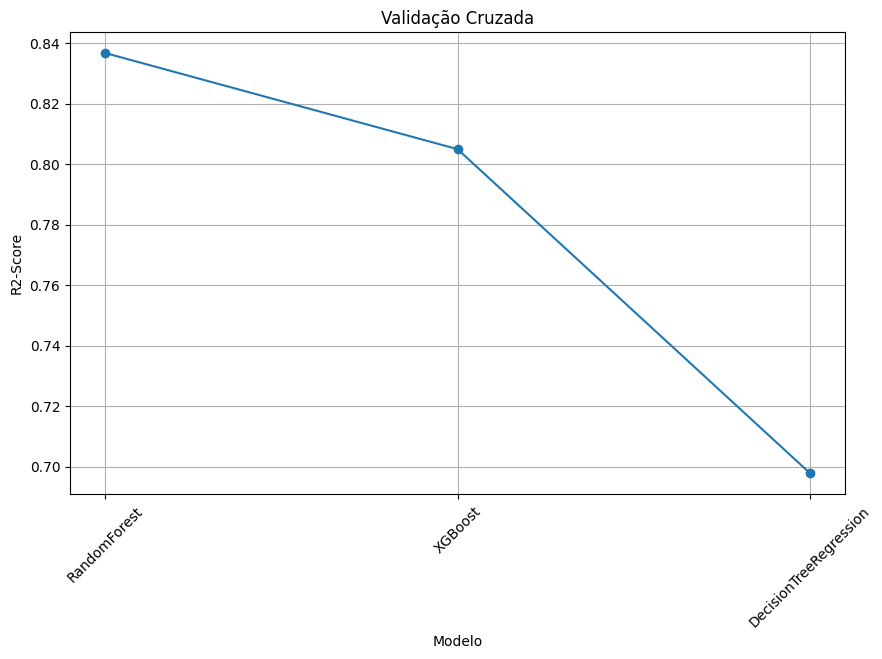

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(validacao_cruzada_mae.index, validacao_cruzada_mae['R2-Score'], marker='o')
plt.title('Validação Cruzada')
plt.xlabel('Modelo')
plt.ylabel('R2-Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Através da análise preliminar e da validação cruzada foi possível verificar que o modelo que está performando melhor é o RandomForest, com isso ele será utilizado para meu modelo final.

**Ajustes finos no modelo.**

Utilizando o GridSeachCV vamos validar quais são os hiperparâmetros que melhor performam no RandomForest.

In [69]:
modelo_final = RandomForestRegressor()

hiperparam_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(modelo_final, hiperparam_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_preprocessado, y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='r2')

Verificando quais foram os melhores hiperparâmetros e o melhor R2-Score.

In [70]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [71]:
grid_search.best_score_

0.8501764765992567

Com isso vamos criar nosso modelo final de predição:

In [73]:
modelo_final = RandomForestRegressor(max_depth=10, 
                                     max_features='sqrt', 
                                     min_samples_leaf=2,
                                     min_samples_split=5,
                                     n_estimators=500,
                                     random_state=42)

### **Treinamento e avaliação do modelo.**

Vamos treinar o nosso modelo final e depois validar como ficou a predição com os dados de teste.

In [81]:
modelo_final.fit(X_treino_preprocessado, y_treino)

modelo_final_pred = modelo_final.predict(X_teste_preprocessado)

modelo_final_mse = mean_squared_error(y_teste, modelo_final_pred)

modelo_final_rmse = np.sqrt(modelo_final_mse)

modelo_final_mae = mean_absolute_error(y_teste, modelo_final_pred)
modelo_final_r2 = r2_score(y_teste, modelo_final_pred)

print(f'RMSE: {modelo_final_rmse}')
print(f'MAE: {modelo_final_mae}')
print(f'R2-Score: {modelo_final_r2}')

RMSE: 4554.64856168717
MAE: 2697.873406175001
R2-Score: 0.8663768584614902


Criando o Pipeline com o preprocessamento e o modelo final.

In [82]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', modelo_final)])

Testando meu pipeline:

In [83]:
pipeline.fit(X_treino, y_treino)

predicao = pipeline.predict(X_teste)

Gravando minhas predições em um arquivo csv:

In [87]:
arquivo_predicao = pd.DataFrame({'encargos_teste': y_teste,
                                 'encargos_predicao': predicao})

arquivo_predicao.to_csv('..\Base de Dados\encargos_preditos.csv', index=False)

### **Validação estatística.**

Verificando através de um gráfico scatter como ficou a relação entre os valores reais e as predições.

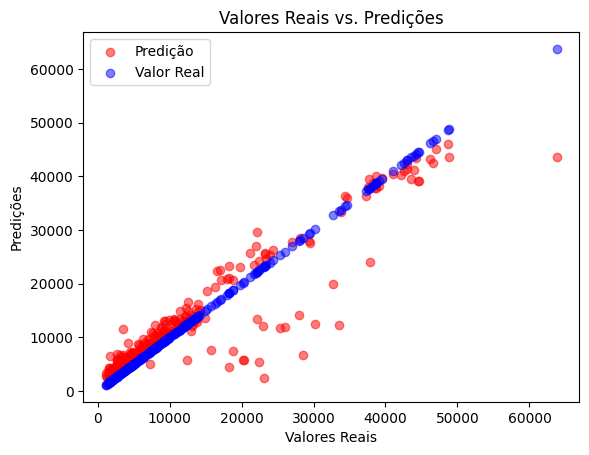

In [90]:
plt.scatter(y_teste, predicao, color='red', alpha=0.5, label='Predição')
plt.scatter(y_teste, y_teste, color='blue', alpha=0.5, label='Valor Real')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Valores Reais vs. Predições')
plt.legend()
plt.show()